In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModel

model_path = "C:\\Users\\subin\\.cache\\huggingface\\hub\\models--SamLowe--roberta-base-go_emotions\\snapshots\\roberta-goemo"
#model_path = "C:\\Users\\subin\\.cache\\huggingface\\hub\\models--roberta-base\\snapshots\\roberta-base"

d:\My Projects\CAPSTONE RESEARCH\finetune.env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import torch
import torch.nn.functional as F

tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModel.from_pretrained(model_path)

def get_embedding(text):
    model.eval()
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True)
        last_hidden_state = outputs.hidden_states[-1]

        # Mean pooling
        attention_mask = inputs['attention_mask']
        mask_expanded = attention_mask.unsqueeze(-1).expand(last_hidden_state.size()).float()
        sum_embeddings = torch.sum(last_hidden_state * mask_expanded, 1)
        sum_mask = torch.clamp(mask_expanded.sum(1), min=1e-9)
        sentence_embedding = sum_embeddings / sum_mask
        sentence_embedding = F.normalize(sentence_embedding, p=2, dim=1)

    return sentence_embedding

Some weights of RobertaModel were not initialized from the model checkpoint at C:\Users\subin\.cache\huggingface\hub\models--SamLowe--roberta-base-go_emotions\snapshots\roberta-goemo and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
pride = "satisfied with one's achievement or high standards"
joy = "feeling great happiness and overwhelming delight"
admiration = "respect and high regard for something excellent or skilled"
amusement = "finding something funny, lighthearted and entertaining"
anger = "strong feeling of displeasure and hostility or tension"
annoyance = "mild irritation or impatience for disturbance or distraction"

approval = "favorable opinion, agreement with something"
caring = "showing concern, kindness for others well-being"
confusion = "lacking understanding, unsure or uncertain"
curiosity = "strong feeling to know or learn something"
desire = "strong feeling of wanting or wishing for something"
disappointment = "displeasure due to unfulfilled expectations"
disapproval = "unfavorable opinion or negative judgment"
disgust = "feeling of revulsion or strong sickness due to some offensive"
embarrassment = "awkward feeling, or shame in public"

excitement = "intense enthusiasm, thrilled, energetic"
fear = "acute alarm caused by perceived danger or threat"
gratitude = "thankfulness and appreciation for kindness"
grief = "deep sorrow, emotional pain caused by loss or death"
love = "deep affection or attraction, profound connection"
nervousness = "feeling uneasy, worried or apprehensive about something"
optimism = "hopefulness and confidence about something in future"
realization = "suddenly achieving clear understanding, awareness"
relief = "feeling of release from anxiety, pain or distress"
remorse = "deep regret or guilt for committed wrong doing"
sadness = "unhappy, sorrowful and lacking cheerfulness"
surprise = "an unexpected, startled feeling from something sudden"
neutral = "absence of strong emotion, neither positive or negative"

In [4]:
joy_embed = get_embedding(joy)
admiration_embed = get_embedding(admiration)
amusement_embed = get_embedding(amusement)
anger_embed = get_embedding(anger)
annoyance_embed = get_embedding(annoyance)
approval_embed = get_embedding(approval)
caring_embed = get_embedding(caring)
confusion_embed = get_embedding(confusion)
curiosity_embed = get_embedding(curiosity)
desire_embed = get_embedding(desire)
disappointment_embed = get_embedding(disappointment)
disapproval_embed = get_embedding(disapproval)
disgust_embed = get_embedding(disgust)
embarrassment_embed = get_embedding(embarrassment)
excitement_embed = get_embedding(excitement)
fear_embed = get_embedding(fear)
gratitude_embed = get_embedding(gratitude)
grief_embed = get_embedding(grief)
love_embed = get_embedding(love)
nervousness_embed = get_embedding(nervousness)
optimism_embed = get_embedding(optimism)
realization_embed = get_embedding(realization)
relief_embed = get_embedding(relief)
remorse_embed = get_embedding(remorse)
sadness_embed = get_embedding(sadness)
surprise_embed = get_embedding(surprise)
neutral_embed =  get_embedding(neutral)
pride_embed = get_embedding(pride)

In [23]:
joy_embed.shape

torch.Size([1, 768])

In [25]:
import torch.nn.functional as F
joy_norm = F.normalize(joy_embed, dim=1)

In [26]:
print(torch.norm(joy_norm, p=2, dim=-1))

tensor([1.0000])


In [9]:
from torch.nn.functional import cosine_similarity
cosine_similarity(pride_embed, joy_embed).item()

0.9248437881469727

In [12]:
e1 = get_embedding("pride")
e2 = get_embedding("joy")
cosine_similarity(e1, e2).item()

0.5900887846946716

In [5]:
label_embeddings = {
    "pride": pride_embed.tolist(),
    "joy": joy_embed.tolist(),
    "admiration": admiration_embed.tolist(),
    "amusement": amusement_embed.tolist(),
    "anger": anger_embed.tolist(),
    "annoyance": annoyance_embed.tolist(),
    "approval": approval_embed.tolist(),
    "caring": caring_embed.tolist(),
    "confusion": confusion_embed.tolist(),
    "curiosity": curiosity_embed.tolist(),
    "desire": desire_embed.tolist(),
    "disappointment": disappointment_embed.tolist(),
    "disapproval": disapproval_embed.tolist(),
    "disgust": disgust_embed.tolist(),
    "embarrassment": embarrassment_embed.tolist(),
    "excitement": excitement_embed.tolist(),
    "fear": fear_embed.tolist(),
    "gratitude": gratitude_embed.tolist(),
    "grief": grief_embed.tolist(),
    "love": love_embed.tolist(),
    "nervousness": nervousness_embed.tolist(),
    "optimism": optimism_embed.tolist(),
    "realization": realization_embed.tolist(),
    "relief": relief_embed.tolist(),
    "remorse": remorse_embed.tolist(),
    "sadness": sadness_embed.tolist(),
    "surprise": surprise_embed.tolist(),
    "neutral": neutral_embed.tolist(),
}

In [6]:
import json

with open("label_embeddings.json", "w") as f:
    json.dump(label_embeddings, f)

In [1]:
import json
import torch

with open("label_embeddings_new.json", "r") as f:
    label_embeddings = json.load(f)

In [31]:
import torch
emo_emb=[]
for k, v in label_embeddings.items():
    emo_emb.append(v)

In [40]:
emotion_bank = torch.cat(emo_emb, dim=0)

In [41]:
emotion_bank.shape

torch.Size([28, 768])

In [3]:
joy_emb = emo_emb.get("joy")
anger_emb = emo_emb.get("anger")
pride_emb = emo_emb.get("pride")
sadness_emb = emo_emb.get("sadness")
annoyance_emb = emo_emb.get("annoyance")

In [28]:
text = "I am absolutely furious that you lied to me and betrayed my trust."

In [29]:
tokenizer(text, return_tensors="pt")

{'input_ids': tensor([[    0,   100,   524,  3668, 15940,    14,    47, 15005,     7,   162,
             8, 26913,   127,  2416,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [20]:
from torch.nn.functional import cosine_similarity
cosine_similarity(text_emb, love_embed).item()

0.899941623210907

In [19]:
e1 = get_embedding("love")
cosine_similarity(text_emb, e1).item()

0.9914311766624451

In [14]:
cosine_similarity(text_emb, annoyance_emb).item()

0.44648632407188416

In [5]:
from torch.nn.functional import cosine_similarity
cosine_similarity(anger_emb, sadness_emb).item()

0.5144199728965759

In [20]:
from torch.nn.functional import cosine_similarity
cosine_similarity(text_emb, annoyance_emb).item()

0.2371494472026825

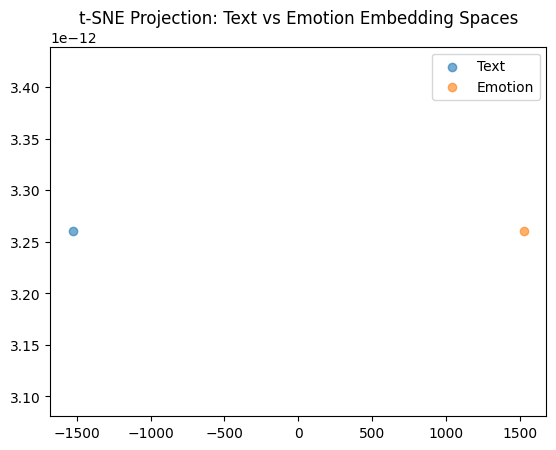

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
combined = np.concatenate([text_emb, anger_emb])
labels = np.array(["text"] * len(text_emb) + ["emotion"] * len(anger_emb))

tsne = TSNE(n_components=2, perplexity=1, random_state=42)
proj = tsne.fit_transform(combined)

plt.scatter(proj[labels=="text",0], proj[labels=="text",1], alpha=0.6, label="Text")
plt.scatter(proj[labels=="emotion",0], proj[labels=="emotion",1], alpha=0.6, label="Emotion")
plt.legend()
plt.title("t-SNE Projection: Text vs Emotion Embedding Spaces")
plt.show()


In [20]:
from sklearn.cross_decomposition import CCA

cca = CCA(n_components=min(text_embeds.shape[1], emotion_embeds.shape[1]))
cca.fit(text_embeds, emotion_embeds)
corrs = np.corrcoef(cca.x_scores_.T, cca.y_scores_.T).diagonal()
print(f"Average canonical correlation: {np.mean(corrs):.4f}")

ValueError: Found array with 1 sample(s) (shape=(1, 768)) while a minimum of 2 is required by CCA.